In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [9]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [11]:
# reflect an existing database into a new model

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table

# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

In [14]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [16]:
# Assign the station class to a variable called `Station`
Station = Base.classes.station

In [17]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [51]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
(recent_date)

'2017-08-23'

In [189]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_day= (dt.datetime.strptime(recent_date, "%Y-%m-%d")).date()

year_ago= recent_day - dt.timedelta(days=365)
year_ago


datetime.date(2016, 8, 23)

In [167]:
date = dt.datetime(2016, 8, 23)
date

datetime.datetime(2016, 8, 23, 0, 0)

In [187]:
# Perform a query to retrieve the data and precipitation scores
results= session.query(Measurement.date, Measurement.prcp).\
                filter((Measurement.date >= date).all()
                                      

SyntaxError: unexpected EOF while parsing (1072133748.py, line 4)

In [185]:
results

# prcp_rows=[{result[0], result[1] for result in results}]
# prcp_rows

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

ConversionError: Failed to convert value(s) to axis units: ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']

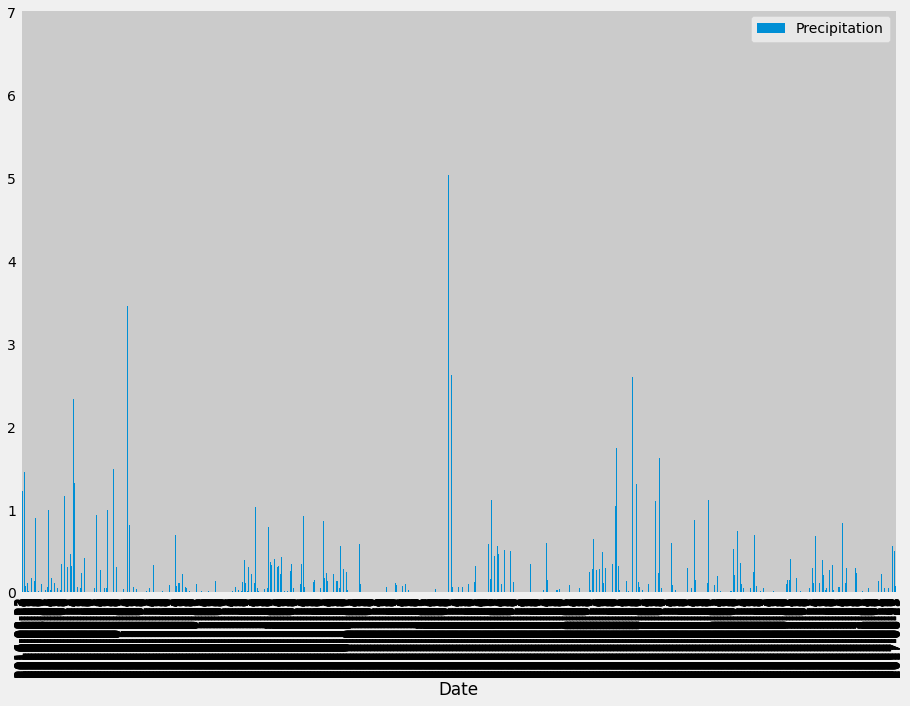

In [119]:
# Save the query results as a Pandas DataFrame and set the index to the date column


prcp_df=pd.DataFrame(results, columns= ["Date", "Precipitation"])
prcp_df=prcp_df.dropna(how="any")
prcp_df= prcp_df.sort_values("Date",ascending= True)
prcp_df=prcp_df.set_index("Date")

# .sort_values("date").set_index("date")



# Sort the dataframe by date
# prcp_df.dropna(axis=0, how="any", inplace=True)

# # prcp_df


# # Use Pandas Plotting with Matplotlib to plot the data



prcp_df.plot.bar(figsize=(14,10))


xticklabels= ["2016-08-23", "2016-10-01", "2016-11-09", "2016-12-19", "2017-01-28", 
              "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-10"]

plt.xticks(xticklabels, rotation= "vertical")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Analysis in Honolulu, Hawaii/n (08-23-2016 to 08-23-2017)")
plt.tight_layout()
plt.show()

In [112]:
prcp_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


In [120]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
total_count = session.query(Station).distinct().count()
print(total_count)

9


In [125]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# List the stations and the counts in descending order.

sel=[Station.station, func.count(Measurement.station)]

active_station=session.query(*sel).\
    filter(Station.station==Measurement.station).\
    group_by(Station.station).\
    order_by(func.count(Measurement.station).desc()).all()

active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [136]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active=session.query(*sel).\
    filter(Station.station==Measurement.station).\
    group_by(Station.station).\
    order_by(func.count(Measurement.station).desc()).first()

most_active_station=most_active[0]
most_active_station

sel_t = [func.min(Measurement.tobs),
         func.max(Measurement.tobs),
         func.avg(Measurement.tobs)]

temp=session.query(*sel_t).\
    filter(Measurement.station == most_active_station).all()

temp

[(54.0, 85.0, 71.66378066378067)]

In [183]:

sel_temp = [(Measurement.date),
        (Measurement.tobs)]

tobs=session.query(*sel_temp).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23').all()
tobs

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [177]:
 active_station= session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= '2016-08-23').\
                        filter(Measurement.date <= '2017-08-23').\
                        order_by(Measurement.date).all()
active_station   

[('2016-08-23', 81.0),
 ('2016-08-23', 76.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 77.0),
 ('2016-08-23', 74.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 76.0),
 ('2016-08-24', 80.0),
 ('2016-08-24', 78.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 77.0),
 ('2016-08-24', 74.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-26', 79.0),
 ('2016-08-26', 78.0),
 ('2016-08-26', 81.0),
 ('2016-08-26', 81.0),
 ('2016-08-26', 84.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 77.0),
 ('2016-08-27', 73.0),
 ('2016-08-27', 81.0),
 ('2016-08-27', 81.0),
 ('2016-08-27', 75.0),
 ('2016-08-27', 74.0),
 ('2016-08-28', 78.0),
 ('2016-08-28', 73.0),
 ('2016-08-28', 81.0),
 ('2016-08-28', 80.0),
 ('2016-08-28', 73.0),
 ('2016-08-28', 71.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 80.0),
 ('2016-08-29', 80.0),
 ('2016-08-

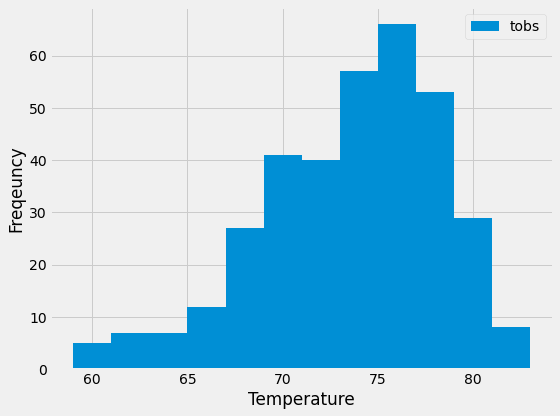

In [151]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_year= session.query(Measurement.tobs).\
            filter(Measurement.date >= year_ago).\
            filter(Measurement.station==most_active_station).all()

#Convert results into a Pandas Dataframe
active_df=pd.DataFrame(active_year, columns= ["TOBS"])
active_df

plt.figure(figsize=(8,6))
plt.hist(active_df["TOBS"], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Freqeuncy")
plt.legend(["tobs"])
plt.tight_layout()
plt.savefig("Resources/station_analysis.png")
plt.show()


# Close session

In [152]:
# Close Session
session.close()